<a href="https://colab.research.google.com/github/qor0530/fontFinding/blob/main/fontfinding_to_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#폰트 깨질때
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (52.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129506 files and dir

In [13]:
 #cnn 예제


 import tensorflow as tf
 import keras
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Flatten
 from keras.layers.convolutional import Conv2D, MaxPooling2D
 import numpy as np

 img_rows = 28
 img_cols = 28

 (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
 print(x_train.shape)
 input_shape = (img_rows, img_cols, 1)
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
 print(x_train.shape)
 x_train = x_train.astype('float32') / 255.
 x_test = x_test.astype('float32') / 255.

 print('x_train shape:', x_train.shape)
 print(x_train.shape[0], 'train samples')
 print(x_test.shape[0], 'test samples')

 batch_size = 128
 num_classes = 10
 epochs = 1 #여러번 학습하면 좋겠지만 시간관계상 3번만 학습하고 결과를 확인합니다.

 y_train = keras.utils.to_categorical(y_train, num_classes)
 y_test = keras.utils.to_categorical(y_test, num_classes)

 model = Sequential()
 model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
 model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
 model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.25))
 model.add(Flatten())
 model.add(Dense(1000, activation='relu'))
 model.add(Dropout(0.5))
 model.add(Dense(num_classes, activation='softmax'))
 model.summary()
 
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

 score = model.evaluate(x_test, y_test, verbose=0)
 print('Test loss:', score[0])
 print('Test accuracy:', score[1])

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000, 28, 28, 1)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropo

TypeError: ignored

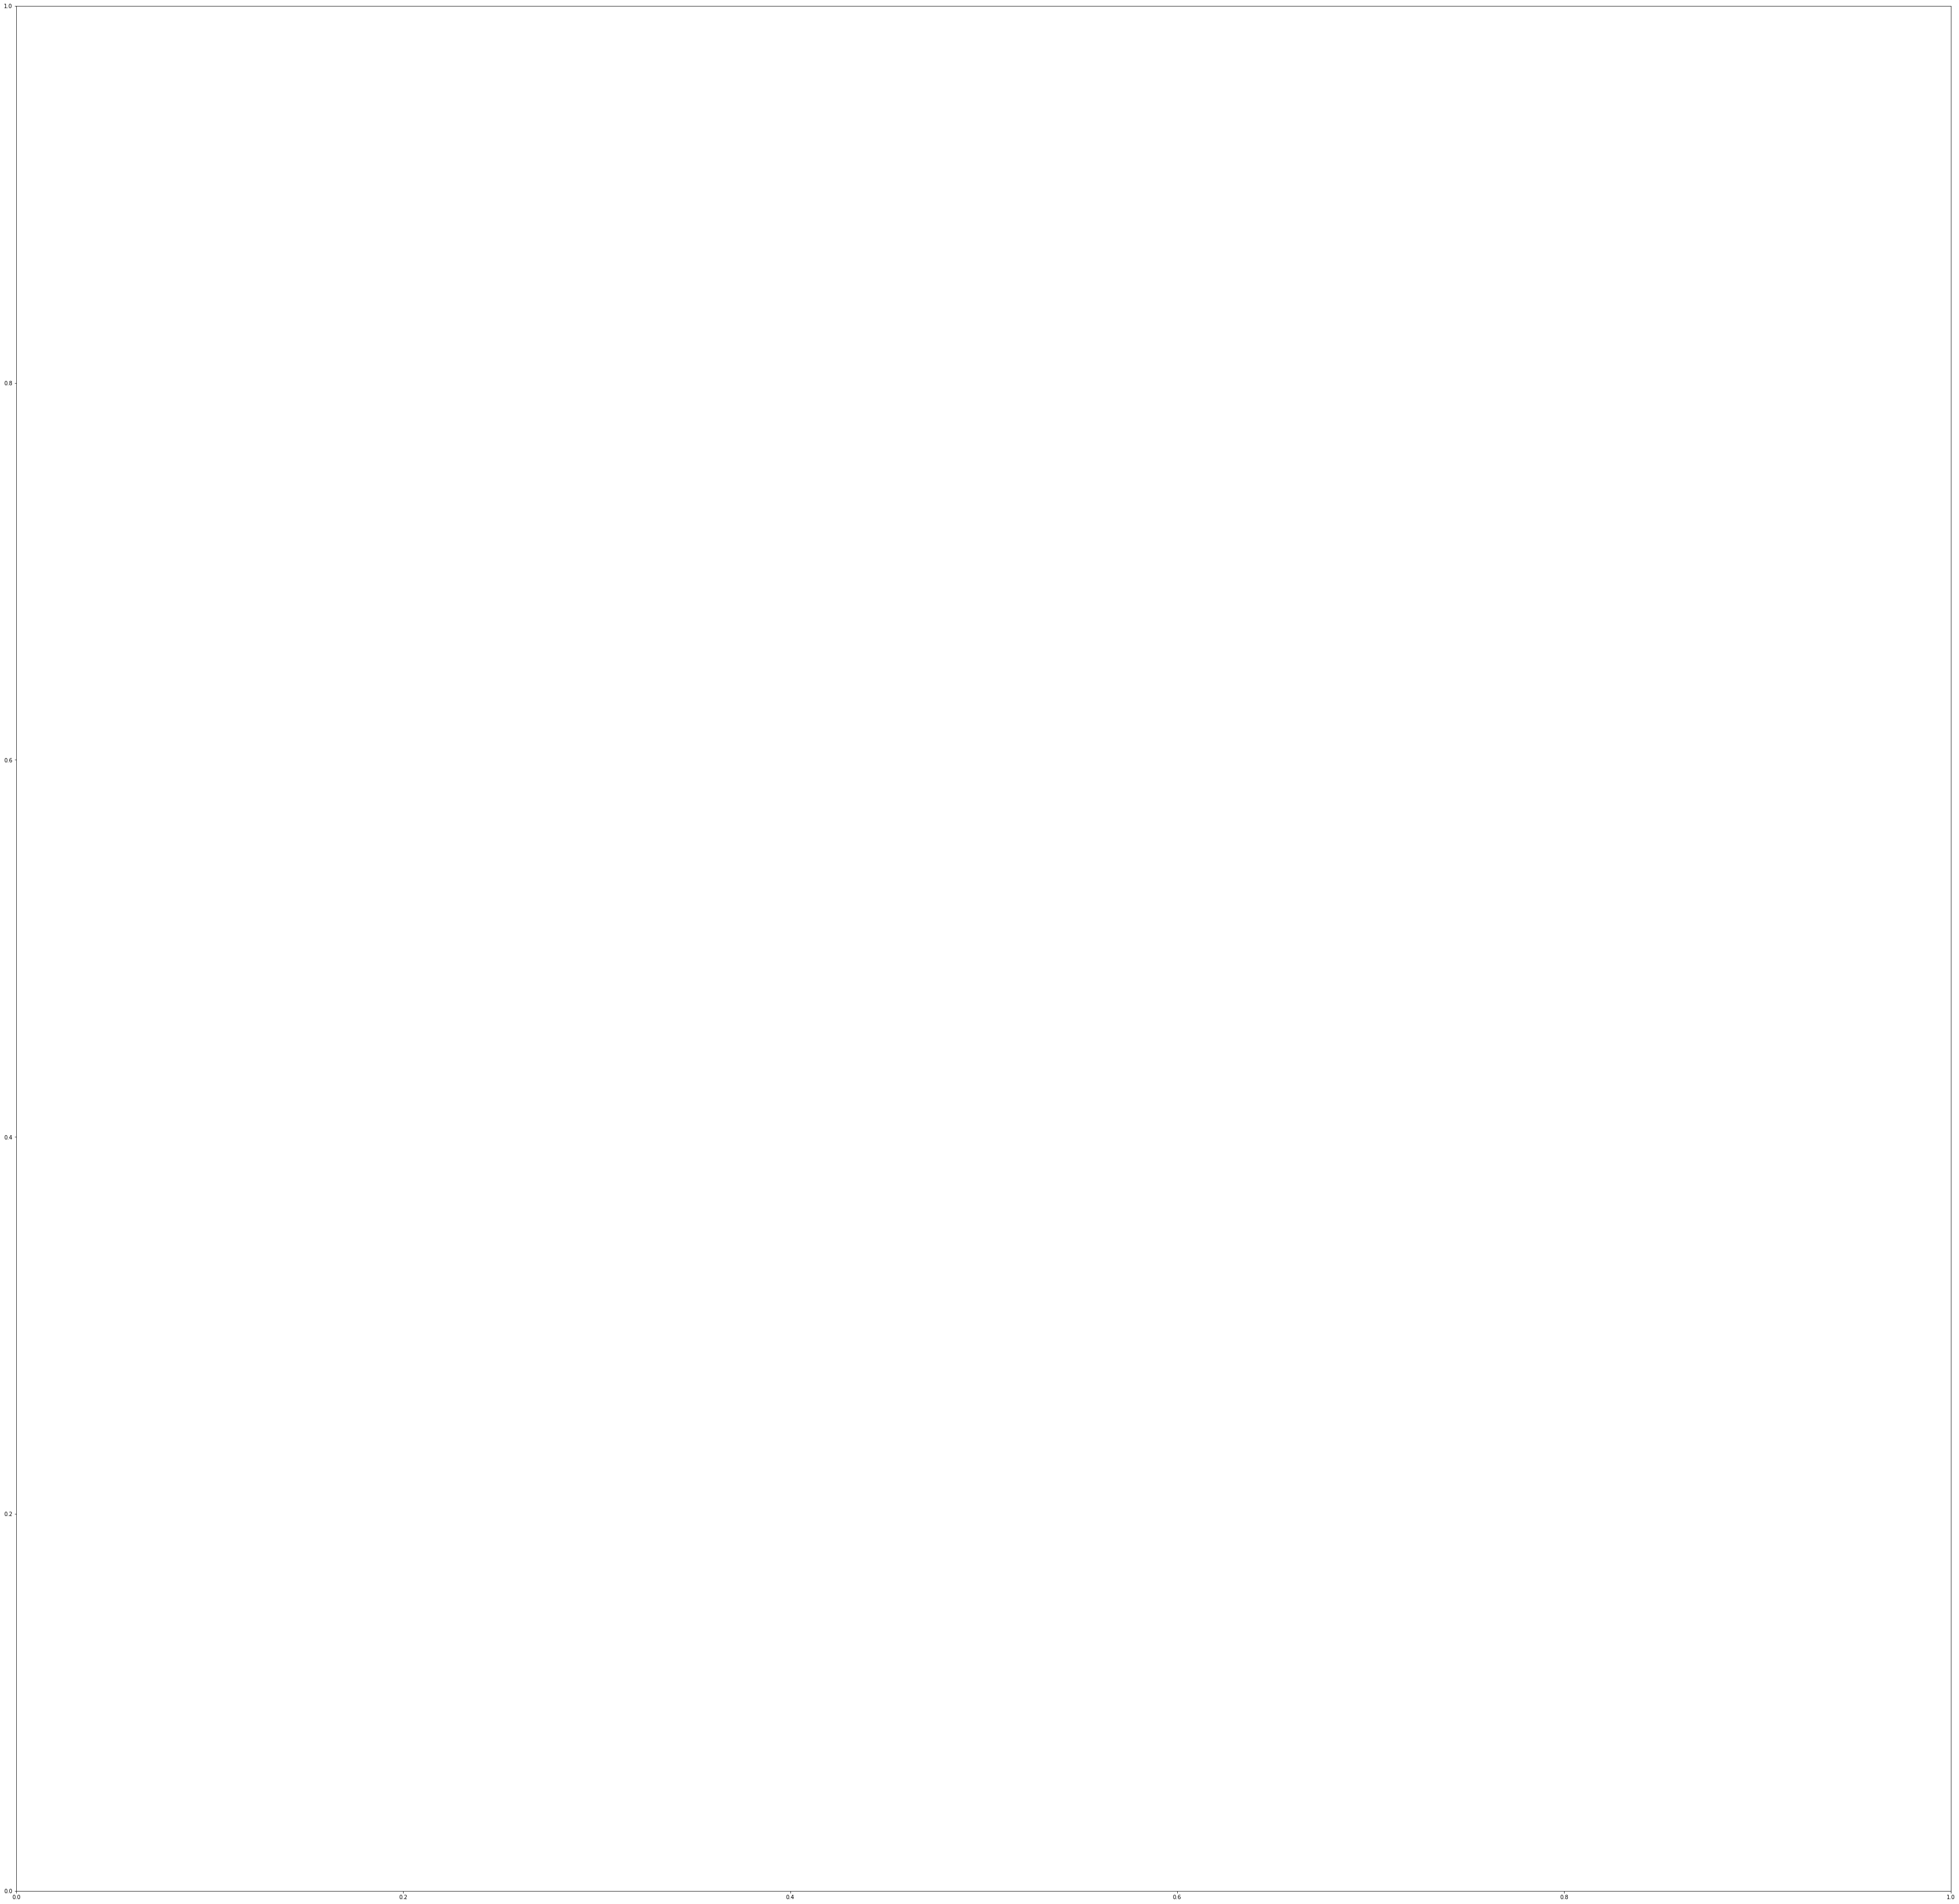

In [15]:
#학습 딥러닝

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

plt.rc('font', family='NanumBarunGothic') # 폰트 오류 방지


# 유니코드 추출 코드 추가



unicode = 44123 # 추출한 한글의 유니코드

# 데이터 뽑아오기 (추후 교환 예정)
gothic_length = 32
myeonjo_length = 31
datasize = gothic_length + myeonjo_length
fontobj = []

for i in range(1,gothic_length + 1):
  df = pd.read_parquet(f'/content/drive/MyDrive/hangul-font-dataset-main/gothic/{i}.pq') #고딕 32까지 있음
  fontobj.append(df.loc[unicode - 44032][0])
for i in range(1,myeonjo_length + 1):
  df = pd.read_parquet(f'/content/drive/MyDrive/hangul-font-dataset-main/myeongjo/{i}.pq') #명조 31까지 있음
  fontobj.append(df.loc[unicode - 44032][0])

df = pd.DataFrame (fontobj).transpose()
np = np.asarray(df)
np = np.reshape(64,64,datasize)
fig = plt.figure(figsize=(64, 64))
ax1 = fig.add_subplot(1, 1, 1)
print(ax1.imshow(Image.fromarray(np), cmap='gray'))

#학습 준비
img_rows = 64
img_cols = 64

# x_train = 
# y_train = 
# x_test = 
# y_test = 

# 모델 준비
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
# model.summary()

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

                                                Image Image size Glyph id  \
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64      985   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64      986   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     1086   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     8836   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     8836   
..                                                ...        ...      ...   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     5928   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     5929   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     5928   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     5929   
0   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...      64,64     5929   

   Weight            Family Name                                       Boun

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_te

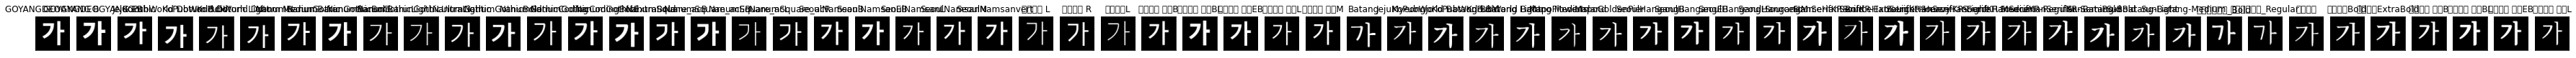

In [ ]:
#테스트

import numpy as np
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

unicode = 44032 #추출한 한글의 유니코드
gothic_length = 32
myeonjo_length = 31
fontobj = []
for i in range(1,gothic_length + 1):
  df = pd.read_parquet(f'/content/drive/MyDrive/hangul-font-dataset-main/gothic/{i}.pq') #고딕 32까지 있음
  fontobj.append(df.loc[unicode - 44032])
for i in range(1,myeonjo_length + 1):
  df = pd.read_parquet(f'/content/drive/MyDrive/hangul-font-dataset-main/myeongjo/{i}.pq') #명조 31까지 있음
  fontobj.append(df.loc[unicode - 44032])

# 폰트 잘 나오는지 확인 코드
fig = plt.figure(figsize=(64, 64))
for i in range(1,gothic_length + myeonjo_length):
  fontImage = fontobj[i-1][0]
  image = Image.fromarray(fontImage.reshape([64, 64]))
  ax1 = fig.add_subplot(1, 63, i)
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.set_title(f'{fontobj[i-1][9]}')
  ax1.imshow(image, cmap='gray')
fontfile = pd.DataFrame(fontobj)